# TP3 CompStat - LACOMBE Yoach

## Exercise 1
### Question 1

To recall the notations, as fixed parameters, we have
$\sigma_{t_0}, \sigma_{v_0}$ (the fixed parameters of the latent variables) AND $ \bar{\bar t_0}, \bar{\bar v_0}, s_{t_0}, s_{v_0}, m_\xi, v_\xi, m_\tau, v_\tau, v, m$ (the fixed parameters of the a priori).

The parameters θ are $(\bar t_0, \bar v_0, \sigma_{\xi}, \sigma_{\tau},\sigma)$, following the model:
$$
\begin{cases}
      \bar t_0 \sim \mathcal N(\bar{\bar t_0},  s_{t_0}^2) \\
      \bar v_0 \sim \mathcal N(\bar{\bar v_0},  s_{v_0}^2) \\
      \sigma^2 \sim \mathcal W^{-1}(v,  m) & \text{and same for } \sigma_{\xi}, \sigma_{\tau}
\end{cases} 
$$

The latent variables are $\xi_{i}, \tau_i, t_0, v_0$ which respects:

$$
\begin{cases}
      \alpha_i = e^{ξ_i}, & \text{where } ξ_i \stackrel{i.i.d}\sim \mathcal N(0,  \sigma_ξ^2)\\
     \tau_i \stackrel{i.i.d}\sim \mathcal N(0,  \sigma_τ^2)\\
     t_0 \sim \mathcal N(\bar t_0,  \sigma_{t_0}^2)\\
     v_0 \sim \mathcal N(\bar v_0,  \sigma_{v_0}^2)
\end{cases} 
$$


####Complete log-likelihood:

 $$log [q(y,z,θ)] = log [q(y|z,\theta)] + log [q(z|\theta)] + log[q(\theta)]$$

where [**note**: I don't write additive constants in the following results]:


---


 $$log [q(y|z,\theta)] = -\sum_{i,j}[||y_{ij} - d_i(t_{ij})||^2/(2\sigma^2) +log\sigma^2/2]$$

 $$ = S_1\phi_1 + \psi_1$$

---



$$log [q(z|\theta)] = -\sum_{i}[||\tau_i||^2/(2\sigma_\tau^2) +log\sigma_\tau^2/2]$$
$$ -\sum_{i}[||\epsilon_i||^2/(2\sigma_\epsilon^2) +log\sigma_\epsilon^2/2]$$
$$ -||t_0 - \bar t_0||^2/(2\sigma_{t_0}^2) -||v_0 - \bar v_0||^2/(2\sigma_{v_0}^2)$$

$$ = S_2\phi_2 + \psi_2$$
$$ + S_3\phi_3 + \psi_3$$
$$+ S_4\phi_4 + \psi_5 + S_5\phi_5 + \psi_5 + R(y,z)$$

---



$$log[q(\theta)] = -|| \bar t_0 -  \bar {\bar t_0}||^2/(2s_{t_0}^2) -|| \bar v_0 -  \bar {\bar v_0}||^2/(2s_{v_0}^2)$$
$$ -(1+m_ξ/2) log \sigma_ξ^2 - v_\xi^2/2\sigma_ξ^2$$
$$ -(1+m_τ/2) log \sigma_τ^2 - v_τ^2/2\sigma_τ^2$$
$$ -(1+m/2) log \sigma^2 - v^2/2\sigma^2$$
$$ = \phi_6$$

---

#### Curved exponential family

**Note:** Let N be the number of individuals and $N_{tot} = \sum^N_{i=1} k_i$

We identify with:

$$
\begin{cases}
     S_1 = \sum_{i,j}[||y_{ij} - d_i(t_{ij})||^2/(N_{tot}) \\ ϕ_1 = -N_{tot}/(2\sigma^2)
\end{cases} 
$$

$$
\begin{cases}
     S_2 = \sum_{i}[||\tau_i||^2/N \\ 
     ϕ_2 = -N/(2\sigma_\tau^2)
\end{cases} 
$$

$$
\begin{cases}
     S_3 = \sum_{i}[||\xi_i||^2/N \\ 
     ϕ_3 = -N/(2\sigma_\xi^2)
\end{cases} 
$$

$$
\begin{cases}
     S_4 = t_0 \\
      ϕ_4 = \bar t_0/(\sigma_{t_0}^2)
\end{cases} 
$$

$$
\begin{cases}
     S_5 = v_0 \\ 
     ϕ_5 = \bar v_0/(\sigma_{v_0}^2)
\end{cases} 
$$

And finally:
$$\psi = - N_{tot}log\sigma^2/2$$
$$ - N log\sigma_\tau^2/2$$
$$-N log\sigma_\xi^2/2$$
$$- \bar v_0^2/(2\sigma_{v_0}^2)$$
$$- \bar t_0^2/(2\sigma_{t_0}^2)$$
$$-|| \bar t_0 -  \bar {\bar t_0}||^2/(2s_{t_0}^2) -|| \bar v_0 -  \bar {\bar v_0}||^2/(2s_{v_0}^2)$$
$$ -(1+m_ξ/2) log \sigma_ξ^2 - v_\xi^2/2\sigma_ξ^2$$
$$ -(1+m_τ/2) log \sigma_τ^2 - v_τ^2/2\sigma_τ^2$$
$$ -(1+m/2) log \sigma^2 - v^2/2\sigma^2$$


### Question 2

Following the probability model, I will sample first from θ, then from z|θ, then from y|z,θ.




In [1]:
from scipy.stats import invwishart, norm, gamma
import scipy
import numpy as np

def draw_from_invwishart(shape, v, m):
  # v = scale > 0, m = df (degree of freedom, int > 0 )
  rv = scipy.stats.invwishart(df=m, scale=v)
  return rv.rvs(shape)

def draw_from_normal_distr(shape, mu, sigma):
  rv = scipy.stats.norm(loc = mu, scale = sigma)
  return rv.rvs(shape)

def synthetic_data_generator(N, k, sigma_t0, sigma_v0, t0_bar_bar, v0_bar_bar,s_t0, s_v0, m_xi, v_xi, m_tau,v_tau, m, v, verbose = True):
  '''
  N: nb of patients. here only works with integer >0.
  k: nb of measurements per patients. (Should be a different integer per patients but I took the same k for every patients out of simplicity)
  '''
  #draw theta
  t0_bar = draw_from_normal_distr(1, t0_bar_bar, s_t0)
  v0_bar = draw_from_normal_distr(1, v0_bar_bar, s_v0)

  sigma_2 = draw_from_invwishart(1, v, m)
  sigma_xi2 = draw_from_invwishart(1, v_xi, m_xi)
  sigma_tau2 = draw_from_invwishart(1, v_tau, m_tau)


  epsilon = draw_from_normal_distr((N,k), 0, np.sqrt(sigma_2))

  #draw latent variables
  xi = draw_from_normal_distr((N,1), 0, np.sqrt(sigma_xi2))
  alpha = np.exp(xi)

  tau = draw_from_normal_distr((N,1), 0, np.sqrt(sigma_tau2))

  t0 = draw_from_normal_distr(1, t0_bar, np.sqrt(sigma_t0))
  v0 = draw_from_normal_distr(1, v0_bar, np.sqrt(sigma_v0))

  if verbose:
    print("sigma, sigma_xi, sigma_tau", sigma_2, sigma_xi2, sigma_tau2)
    print("t0_bar, t0", t0_bar, t0)
    print("vo_bar, v0", v0_bar, v0)

  T = np.zeros((N,1))
  rv = scipy.stats.gamma(1)
  T = rv.rvs((N,k))
  T = np.cumsum(T, axis = 1)




  y = v0*(alpha*(T - t0 - tau)) + epsilon

  theta = [t0_bar, v0_bar, (sigma_xi2), (sigma_tau2), (sigma_2)]
  latent = [xi, tau, v0, t0]
  return T, y, theta, latent

In [21]:
#parameters setting

N = 7
k = 40

sigma_t0 = 1

sigma_v0 = 2 

t0_bar_bar = 2

v0_bar_bar = 3

s_t0 = 5
s_v0 = 5

m_xi = 3
v_xi = .1
m_tau = 3
v_tau = .2
m = 3 
v = .1


samples_time, samples, theta_true, latent_true = synthetic_data_generator(N, k, sigma_t0, sigma_v0, t0_bar_bar, v0_bar_bar,s_t0, s_v0, m_xi, v_xi, m_tau,v_tau, m, v)

sigma, sigma_xi, sigma_tau 0.08613635820211252 0.025457933192624425 0.1240883914761929
t0_bar, t0 [6.63474285] [7.61670864]
vo_bar, v0 [6.09501178] [6.23906862]


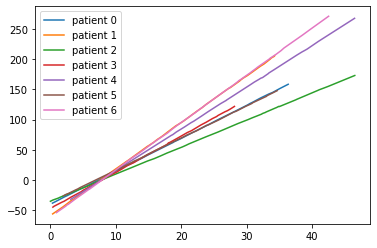

In [22]:
import matplotlib.pyplot as plt

for i in range(N):
  plt.plot(samples_time[i,:], samples[i,:], label = "patient " + str(i))

plt.legend()
plt.show()


### Question 3

As indicated in the statement, and after simplification,
$$ \alpha_k = min[1, q(z^*,y,\theta)/q(z^{(k)},y,\theta)]$$

Moreover, we'll take $z^* \sim \mathcal N(z^{(k)}, \sigma_{prop}).$



In [4]:
def log_likelihood(T, t0, v0, xi, tau, observations, theta, compute_log_theta = True, theta_parameters = None, sigma_t0 = 2, sigma_vo = 3):
  '''
  T : times t_ij 
  theta = [to_bar, v0_bar, sigma_xi, sigma_tau, sigma]
  theta_parameters = t0_bar_bar, v0_bar_bar,s_t0, s_v0, m_xi, v_xi, m_tau,v_tau, m, v
  #Beware, sigma is already squared (sigma = sigma^2 instead of sigma)
  '''
  lg = 0

  t0_bar, v0_bar, sigma_xi, sigma_tau, sigma = theta
  if compute_log_theta:
    t0_bar_bar, v0_bar_bar,s_t0, s_v0, m_xi, v_xi, m_tau,v_tau, m, v = theta_parameters
    lg += - (t0_bar_bar -t0_bar)**2/(2*s_t0) - (v0_bar_bar -v0_bar)**2/(2*s_v0)
    lg += -(1 + m/2)*np.log(sigma) - v**2/(2*sigma)
    lg += -(1 + m_xi/2)*np.log(sigma_xi) - v_xi**2/(2*sigma_xi)
    lg += -(1 + m_tau/2)*np.log(sigma_tau) - v_tau**2/(2*sigma_tau)


  #log q (z|theta)
  lg += - (t0_bar -t0)**2/(2*sigma_t0) - (v0_bar -v0)**2/(2*sigma_v0)
  lg += -len(tau)*(np.log(sigma_tau) + np.log(sigma_xi))/2 
  lg += -np.sum(tau*tau)/ (2*sigma_tau) - np.sum(xi*xi)/ (2*sigma_xi)

  #log q(y|z,theta)
  predictions = v0*(np.exp(xi)*(T - t0 - tau))
  lg += -np.sum( np.square(observations-predictions)/(2*sigma) + np.log(sigma)/2)

  return lg

In [5]:

  
class MH_sampler():
  def __init__(self, sigma_prop, N, observations, theta, T, theta_parameters, sigma_t0 = 2, sigma_v0 = 3):
    '''
    sigma_prop: trade-off between exploration and exploitation
    theta: as in the enonce
    theta_parameters: the hyperparameters defining the law of theta
    '''
    self.sigma_prop = sigma_prop
    self.log_likelihoods = []
    self.alphas = []
    self.theta_parameters = theta_parameters

    self.N = N
    #2N + 2 = size of latent variable

    self.observations = observations
    self.theta = theta
    self.sigma_t0 = sigma_t0
    self.sigma_v0 = sigma_v0

    self.compteur_acceptance = 0

    self.T = T

  def log_likelihood(self, t0, v0, xi, tau):

    return log_likelihood(self.T, t0, v0, xi, tau, self.observations, self.theta, compute_log_theta = False, theta_parameters = self.theta_parameters, sigma_t0= self.sigma_t0, sigma_vo= self.sigma_v0)

  def initialize_algo(self, t0 = None, v0 = None, xi = None, tau = None):
    #latent variables = t0, v0, xi, tau

    if t0 is not None:
      self.t0 = t0
      self.v0 = v0
      self.xi = xi
      self.alpha = np.exp(self.xi)
      self.tau = tau
    else:
      self.t0 = 0
      self.v0 = 1
      self.xi = np.zeros((self.N,1))
      self.alpha = np.exp(self.xi)
      self.tau = np.random.normal(size = (self.N,1))

  
  def sample(self):
    t0 = draw_from_normal_distr(1, self.t0, self.sigma_prop)
    v0 = draw_from_normal_distr(1, self.v0, self.sigma_prop)
    xi = [draw_from_normal_distr(1, x, self.sigma_prop) for x in self.xi]
    xi = np.array(xi)

    tau = [draw_from_normal_distr(1, x, self.sigma_prop) for x in self.tau]
    tau = np.array(tau)

    return t0, v0, xi, tau

  def step(self):
    #proposal
    t0, v0, xi, tau = self.sample()

    #acceptance-rejection
    lg_k = self.log_likelihood(self.t0, self.v0, self.xi, self.tau)
    self.log_likelihoods.append(lg_k)
    alpha = min(0, (self.log_likelihood(t0, v0, xi, tau) - lg_k)[0])

    self.alphas.append(alpha)

    u = np.log(np.random.uniform())
    #acceptance
    if u<=alpha:
      self.compteur_acceptance += 1
      #print("acceptance", alpha, u, self.log_likelihood(t0, v0, xi, tau), lg_k)
      self.t0 = t0
      self.v0 = v0
      self.xi = xi
      self.tau = tau
    #else:
    #  print("reject", alpha, u, self.log_likelihood(t0, v0, xi, tau), lg_k)


    #rejectance - do nothing


### Question 4

Thanks to question 1, we have $\Phi$ and $\Psi$.

Coordinate-wise, the function we want to maximize goes to $-\infty$ at its extremities and has one critical point, so it has one maximum coordinate-wise, so one maximum everywhere. We can compute the gradient coordinate-wise and set it equals to 0 to find the optimal parameters.

Let's denote $Q(\theta) = \Phi(\theta) + S_k^T\Psi(\theta)$.

$\nabla_{\bar t_0} Q(\theta) = S_4/(\sigma_{t_0}^2) - \bar t_0 /(\sigma_{t_0}^2) -(\bar t_0 -  \bar {\bar t_0})/(s_{t_0}^2) = 0$

So $\bar t_0 = \frac{S_4/\sigma_{t_0}^2 + \bar {\bar t_0}/s_{t_0}^2}{1/\sigma_{t_0}^2 + 1/s_{t_0}^2}$.

In the same manner,
$\bar v_0 = \frac{S_5/\sigma_{v_0}^2 + \bar {\bar v_0}/s_{v_0}^2}{1/\sigma_{v_0}^2 + 1/s_{v_0}^2}$.

For $\sigma, \sigma_\tau, \sigma_\xi$, we can compute in the same manner:
$\nabla_{\sigma^2} Q(\theta) = +S_1N_{tot}/(2\sigma^4)- N_{tot}/(2\sigma^2) -(1+m/2)/\sigma^2 +v^2/2\sigma^4  = 0$

That is $\sigma^2 = \frac{N_{tot}S_1 + v^2}{N_{tot} + 2 + m}$.


To resume,




$$
\begin{cases}
     \bar t_0 = \frac{S_4/\sigma_{t_0}^2 + \bar {\bar t_0}/s_{t_0}^2}{1/\sigma_{t_0}^2 + 1/s_{t_0}^2}\\ 
     \bar v_0 = \frac{S_5/\sigma_{v_0}^2 + \bar {\bar v_0}/s_{v_0}^2}{1/\sigma_{v_0}^2 + 1/s_{v_0}^2}\\
     \sigma^2 = \frac{N_{tot}S_1 + v^2}{N_{tot} + 2 + m}\\
     \sigma_\tau^2 = \frac{NS_2 + v_\tau^2}{N + 2 + m_\tau}\\
     \sigma_\xi^2 = \frac{NS_3 + v_\xi^2}{N + 2 + m_\xi}
\end{cases} 
$$


Recall that at step k:

$$
\begin{cases}
     S_1 = \sum_{i,j}[||y_{ij} - d_i(t_{ij})||^2/(N_{tot}) \\ 
     S_2 = \sum_{i}[||\tau_i||^2/N \\ 
     S_3 = \sum_{i}[||\xi_i||^2/N \\
     S_4 = t_0 \\ 
     S_5 = v_0 \\ 
\end{cases} 
$$


In [23]:

class MCMC_SAEM():
  def __init__(self, sigma_prop, N, observations, T, theta_parameters, sigma_t0 = 2, sigma_v0 = 3):
    self.sigma_prop = sigma_prop
    self.log_likelihoods = []
    self.alphas = []
    self.theta_parameters = theta_parameters

    self.N = N
    #2N + 2 = size of latent variable

    self.observations = observations
    self.sigma_t0 = sigma_t0
    self.sigma_v0 = sigma_v0
    self.compteur = 0

    self.T = T    

  def initialize_algo(self, initial_guess_theta, maxIter = 5000, alpha_burn_in = 0.8):
    self.theta = initial_guess_theta
    self.t0 = 0
    self.v0 = 0
    self.xi = np.zeros((self.N,1))
    self.alpha = np.exp(self.xi)
    self.tau = np.zeros((self.N,1))  

    self.maxIter = maxIter
    self.burn_in = maxIter//2
    self.alpha_burn_in = alpha_burn_in

    self.S1 = 0
    self.S2 = 0
    self.S3 = 0
    self.S4 = 0
    self.S5 = 0

  def sample(self, maxIterSampling):
    #Simulation
    sampler = MH_sampler(self.sigma_prop, self.N, self.observations, self.theta, self.T,theta_parameters = self.theta_parameters, sigma_t0 = self.sigma_t0, sigma_v0 = self.sigma_v0)

    sampler.initialize_algo(t0 = self.t0, v0 = self.v0, xi = self.xi, tau = self.tau)
    for i in range(maxIterSampling):
      sampler.step()

    return sampler


  def step(self, maxIterSampling = 10):
    #Simulation
    sampler = self.sample(maxIterSampling)

    self.t0 = sampler.t0
    self.v0 = sampler.v0
    self.xi = sampler.xi
    self.tau = sampler.tau

    #plot and verbose
    if self.compteur == self.burn_in:
      print("------Start Learning (eps<1) ---")

    if (self.compteur%50 == 0 and self.compteur>=self.burn_in) or self.compteur == 0:
      print('---iteration number', self.compteur, '-----')
      plt.hist(np.exp(sampler.alphas))
      print("acceptance counter: ",sampler.compteur_acceptance)
      plt.show()
      

    #Stochastic approximation
    if self.compteur <= self.burn_in:
      eps = 1
    else:
      eps = (self.compteur-self.burn_in)**(-self.alpha_burn_in)
    self.compteur+=1

    predictions = self.v0*(np.exp(self.xi)*(self.T - self.t0 - self.tau))
    self.S1 = self.S1*(1-eps) + eps*np.mean(np.square(self.observations - predictions))
    self.S2 = self.S2*(1-eps) + eps*np.mean(self.tau*self.tau)
    self.S3 = self.S3*(1-eps) + eps*np.mean(self.xi*self.xi)
    self.S4 = self.S4*(1-eps) + eps*self.t0
    self.S5 = self.S5*(1-eps) + eps*self.v0


    #Maximization

    t0_bar_bar, v0_bar_bar,s_t0, s_v0, m_xi, v_xi, m_tau,v_tau, m, v = self.theta_parameters

    #theta = [to_bar, v0_bar, sigma_xi, sigma_tau, sigma]
    #theta_parameters = t0_bar_bar, v0_bar_bar,s_t0, s_v0, m_xi, v_xi, m_tau,v_tau, m, v

    t0_bar = (self.S4/(self.sigma_t0**2) + t0_bar_bar/(s_t0**2))/ (1/(self.sigma_t0**2) + 1/(s_t0**2))
    v0_bar = (self.S5/(self.sigma_v0**2) + v0_bar_bar/(s_v0**2))/ (1/(self.sigma_v0**2) + 1/(s_v0**2))

    sigma = (self.T.size*self.S1 + v**2)/(self.T.size + 2 + m)
    sigma_tau = (self.tau.size*self.S2 + v_tau**2)/(self.tau.size + 2 + m_tau)
    sigma_xi = (self.xi.size*self.S3 + v_xi**2)/(self.xi.size + 2 + m_xi)

    self.theta = [t0_bar, v0_bar, sigma_xi, sigma_tau, sigma]

In [27]:
sigma_prop = 0.01
observations = samples
T = samples_time
theta_parameters = t0_bar_bar, v0_bar_bar,s_t0, s_v0, m_xi, v_xi, m_tau,v_tau, m, v

maxIter = 102
maxIterSampling = 100

In [28]:

initial_guess_theta = [-5, 2, .5, .6, 1]


solver = MCMC_SAEM(sigma_prop, N, observations, T, theta_parameters, sigma_t0 = sigma_t0, sigma_v0 = sigma_v0)
solver.initialize_algo(initial_guess_theta, maxIter = maxIter, alpha_burn_in = 0.6)

---iteration number 0 -----
acceptance counter:  45


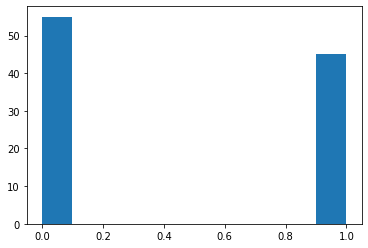

------Start Learning (eps<1) ---
---iteration number 100 -----
acceptance counter:  0


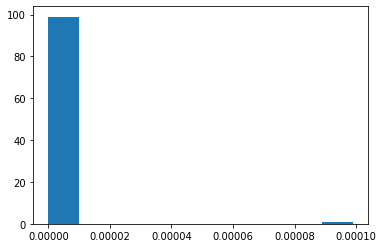

In [29]:
for j in range(maxIter):
  solver.step(maxIterSampling)

[array([6.81665826]), array([3.37105436]), 0.2173695740726256, 0.1902948202173876, 1.1627385309603415]
[array([6.63474285]), array([6.09501178]), 0.025457933192624425, 0.1240883914761929, 0.08613635820211252]


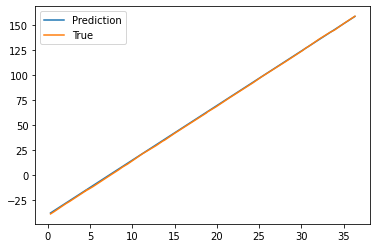

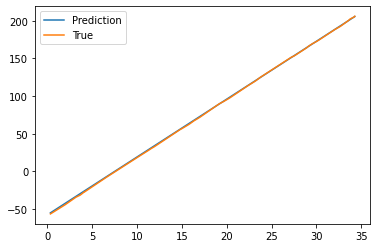

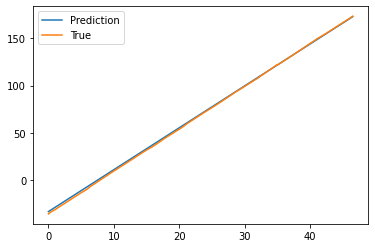

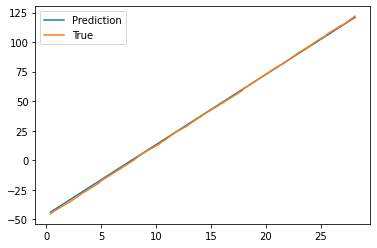

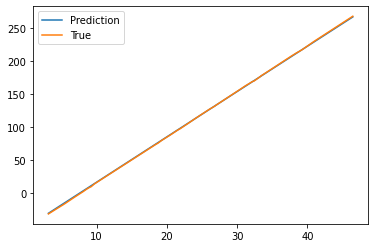

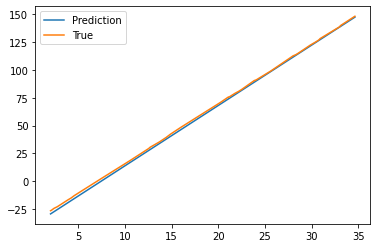

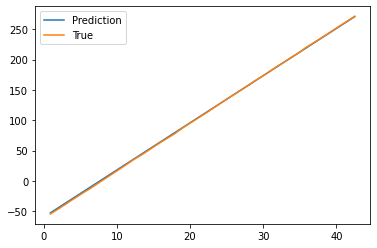

In [30]:
print(solver.theta)
print(theta_true)

predictions =solver.v0*(np.exp(solver.xi)*(solver.T - solver.t0 - solver.tau))
for i in range(N):
  plt.plot(T[i,:], predictions[i,:], label = "Prediction")
  plt.plot(T[i,:], samples[i,:], label = "True")
  plt.legend()
  plt.show()



### Question 5 and 6

We use the same algorithm than in Algorithm 2. The only difference rests in the **#simulation** step. Indeed instead of sampling directly $z^{(k+1)}$ at once, we sample each composant $z^{(k+1)}_i$ following the Gibbs sampler algorithm.

To draw $z^{(k+1)}_i$, you simply use the second algorithm, except that $z^{(k+1)}_{-l}$ is fixed everywhere.

So to resume, for each i, we draw $z^*_{i}$ from $\mathcal N(z^{(k)}_i, \sigma_{prop})$ and accept the $z^*$ defined as $(z^{(k+1)}_1,...z^{(k+1)}_{i-1}, z^{*}_i, z^{(k)}_{i+1},..., z^{(k)}_{2N+2})$ with probability $\alpha$ with:
$$\alpha = min(1, q(z^*, y, \theta)/q((z^{(k+1)}_1,...z^{(k+1)}_{i-1}, z^{(k)}_i, z^{(k)}_{i+1},..., z^{(k)}_{2N+2}), y, \theta))$$.

### Question 7






In [31]:

  
class MHwG_sampler(MH_sampler):
  def __init__(self, sigma_prop, N, observations, theta, T, theta_parameters, sigma_t0 = 2, sigma_v0 = 3):
    super(MHwG_sampler, self).__init__(sigma_prop, N, observations, theta, T, theta_parameters, sigma_t0 = sigma_t0, sigma_v0 = sigma_v0)

  def sample_xi(self,index):
    return draw_from_normal_distr(1, self.xi[index], self.sigma_prop)

  def sample_tau(self,index):
    return draw_from_normal_distr(1, self.tau[index], self.sigma_prop)
  
  def sample_t0(self):
    return draw_from_normal_distr(1, self.t0, self.sigma_prop)

  def sample_v0(self):
    return draw_from_normal_distr(1, self.v0, self.sigma_prop)

  def acceptance_rejection(self, t0, v0, xi, tau):
    #acceptance-rejection
    lg_k = self.log_likelihood(self.t0, self.v0, self.xi, self.tau)
    self.log_likelihoods.append(lg_k)
    alpha = min(0, (self.log_likelihood(t0, v0, xi, tau) - lg_k)[0])

    self.alphas.append(alpha)

    u = np.log(np.random.uniform())
    #acceptance
    if u<=alpha:
      self.compteur_acceptance += 1
      self.t0 = t0
      self.v0 = v0
      self.xi = xi
      self.tau = tau
    #rejectance - do nothing
    
  def step_v0(self):
    #proposal
    v0 = self.sample_v0()
    self.acceptance_rejection(self.t0, v0, self.xi, self.tau)
  
  def step_t0(self):
    #proposal
    t0 = self.sample_t0()
    self.acceptance_rejection(t0, self.v0, self.xi, self.tau)

  def step_xi(self, index):
    #proposal
    xi_i = self.sample_xi(index)
    proposition_xi = self.xi.copy()
    proposition_xi[index] = xi_i
    self.acceptance_rejection(self.t0, self.v0, proposition_xi, self.tau)

  def step_tau(self, index):
    #proposal
    tau_i = self.sample_tau(index)
    proposition_tau = self.tau.copy()
    proposition_tau[index] = tau_i
    self.acceptance_rejection(self.t0, self.v0, self.xi, proposition_tau)


In [32]:

class MCMC_SAEM_with_MHwG_sampler(MCMC_SAEM):
  def __init__(self, sigma_prop, N, observations, T, theta_parameters, sigma_t0 = 2, sigma_v0 = 3):
    super(MCMC_SAEM_with_MHwG_sampler, self).__init__(sigma_prop, N, observations, T, theta_parameters, sigma_t0 = sigma_t0, sigma_v0 = sigma_v0)

  def sample(self, maxIterSampling):
    #Simulation
    sampler = MHwG_sampler(self.sigma_prop, self.N, self.observations, self.theta, self.T,theta_parameters = self.theta_parameters, sigma_t0 = self.sigma_t0, sigma_v0 = self.sigma_v0)
    sampler.initialize_algo(t0 = self.t0, v0 = self.v0, xi = self.xi, tau = self.tau)

    #t0
    for i in range(maxIterSampling):
      sampler.step_t0()

    #v0
    for i in range(maxIterSampling):
      sampler.step_v0()

    #xi
    for j in range(len(self.xi)):
      for i in range(maxIterSampling):
        sampler.step_xi(j)
    
    #tau
    for j in range(len(self.tau)):
      for i in range(maxIterSampling):
        sampler.step_tau(j)

    return sampler



In [33]:

initial_guess_theta = [-5, 2, .5, .6, 1]
sigma_prop = 0.4


solver = MCMC_SAEM_with_MHwG_sampler(sigma_prop, N, observations, T, theta_parameters, sigma_t0 = sigma_t0, sigma_v0 = sigma_v0)
solver.initialize_algo(initial_guess_theta, maxIter = maxIter, alpha_burn_in = 0.6)

---iteration number 0 -----
acceptance counter:  299


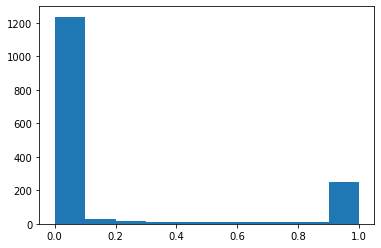

------Start Learning (eps<1) ---
---iteration number 100 -----
acceptance counter:  20


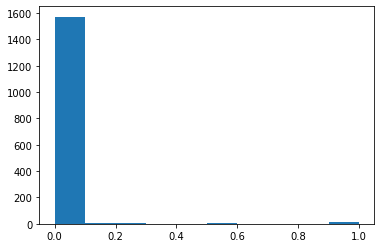

In [34]:
for j in range(maxIter):
  solver.step(maxIterSampling = maxIterSampling)

[array([-4.81335093]), array([5.71581212]), 0.022361392579823405, 94.98118308963917, 0.08781579575816566]
[array([6.63474285]), array([6.09501178]), 0.025457933192624425, 0.1240883914761929, 0.08613635820211252]


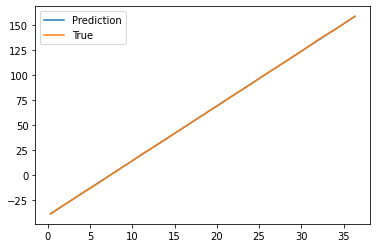

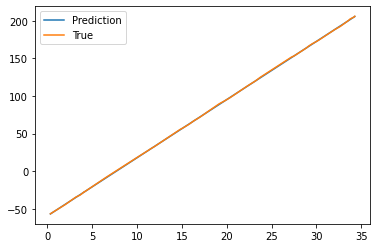

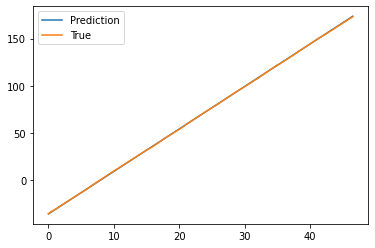

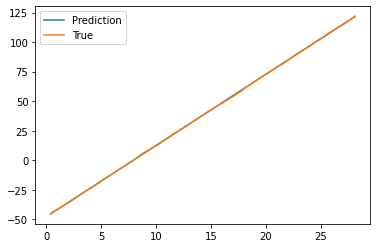

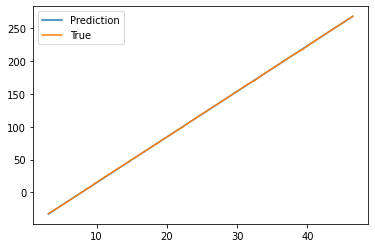

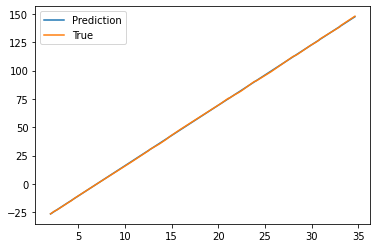

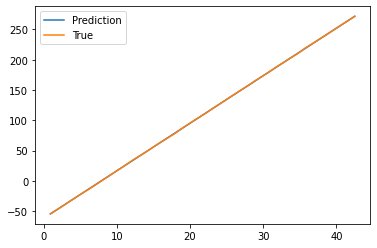

In [35]:
print(solver.theta)
print(theta_true)

predictions =solver.v0*(np.exp(solver.xi)*(solver.T - solver.t0 - solver.tau))
for i in range(N):
  plt.plot(T[i,:], predictions[i,:], label = "Prediction")
  plt.plot(T[i,:], samples[i,:], label = "True")
  plt.legend()
  plt.show()

### Question 8

Advantages:


*   Sampling and updating variable by variable is time consuming. Grouping by block makes it faster.
*   It might be more efficient to update small block per small block, ex: in 2d, using 1d Gibbs sampling is not time reversing, whereas using MH on the two dimensions is (you can move diagonaly and revert).

### Question 9






In [36]:

  
class MHwG_sampler_per_block(MH_sampler):
  def __init__(self, sigma_prop, N, observations, theta, T, theta_parameters, sigma_t0 = 2, sigma_v0 = 3):
    super(MHwG_sampler_per_block, self).__init__(sigma_prop, N, observations, theta, T, theta_parameters, sigma_t0 = sigma_t0, sigma_v0 = sigma_v0)

  def sample_xi(self,index):
    return draw_from_normal_distr(1, self.xi[index], self.sigma_prop)

  def sample_tau(self,index):
    return draw_from_normal_distr(1, self.tau[index], self.sigma_prop)
  
  def sample_t0(self):
    return draw_from_normal_distr(1, self.t0, self.sigma_prop)

  def sample_v0(self):
    return draw_from_normal_distr(1, self.v0, self.sigma_prop)

  def acceptance_rejection(self, t0, v0, xi, tau):
    #acceptance-rejection
    lg_k = self.log_likelihood(self.t0, self.v0, self.xi, self.tau)
    self.log_likelihoods.append(lg_k)
    alpha = min(0, (self.log_likelihood(t0, v0, xi, tau) - lg_k)[0])

    self.alphas.append(alpha)

    u = np.log(np.random.uniform())
    #acceptance
    if u<=alpha:
      self.compteur_acceptance += 1
      self.t0 = t0
      self.v0 = v0
      self.xi = xi
      self.tau = tau
    #rejectance - do nothing
    
  def step_fixed_effects(self):
    #proposal
    v0 = self.sample_v0()
    t0 = self.sample_t0()
    self.acceptance_rejection(t0, v0, self.xi, self.tau)

  def step_per_individuals(self, index):
    #proposal
    xi_i = self.sample_xi(index)
    proposition_xi = self.xi.copy()
    proposition_xi[index] = xi_i

    tau_i = self.sample_tau(index)
    proposition_tau = self.tau.copy()
    proposition_tau[index] = tau_i

    self.acceptance_rejection(self.t0, self.v0, proposition_xi, proposition_tau)


In [37]:

class MCMC_SAEM_with_MHwG_sampler_per_block(MCMC_SAEM):
  def __init__(self, sigma_prop, N, observations, T, theta_parameters, sigma_t0 = 2, sigma_v0 = 3):
    super(MCMC_SAEM_with_MHwG_sampler_per_block, self).__init__(sigma_prop, N, observations, T, theta_parameters, sigma_t0 = sigma_t0, sigma_v0 = sigma_v0)

  def sample(self, maxIterSampling):
    #Simulation
    sampler = MHwG_sampler_per_block(self.sigma_prop, self.N, self.observations, self.theta, self.T,theta_parameters = self.theta_parameters, sigma_t0 = self.sigma_t0, sigma_v0 = self.sigma_v0)
    sampler.initialize_algo(t0 = self.t0, v0 = self.v0, xi = self.xi, tau = self.tau)

    #fixed effects
    for i in range(maxIterSampling):
      sampler.step_fixed_effects()

    #individuals
    for j in range(len(self.xi)):
      for i in range(maxIterSampling):
        sampler.step_per_individuals(j)


    return sampler



In [38]:

initial_guess_theta = [-5, 2, .5, .6, 1]


solver = MCMC_SAEM_with_MHwG_sampler_per_block(sigma_prop, N, observations, T, theta_parameters, sigma_t0 = sigma_t0, sigma_v0 = sigma_v0)
solver.initialize_algo(initial_guess_theta, maxIter = maxIter, alpha_burn_in = 0.6)

---iteration number 0 -----
acceptance counter:  71


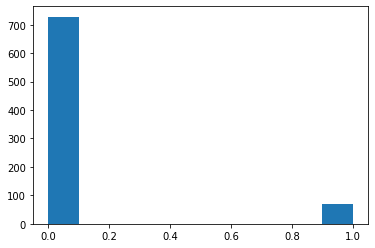

------Start Learning (eps<1) ---
---iteration number 100 -----
acceptance counter:  0


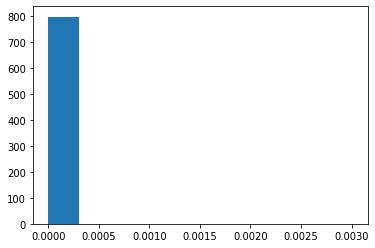

In [39]:
for j in range(maxIter):
  solver.step(maxIterSampling = maxIterSampling)

[array([6.55099724]), array([5.50844684]), 0.023355498455363954, 0.5785902298152583, 0.09551766734955787]
[array([6.63474285]), array([6.09501178]), 0.025457933192624425, 0.1240883914761929, 0.08613635820211252]


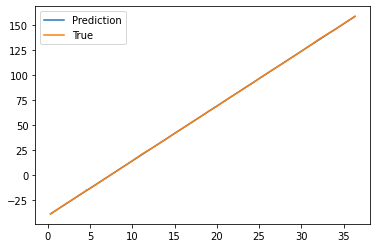

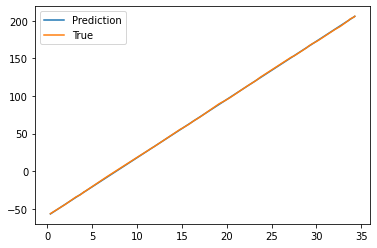

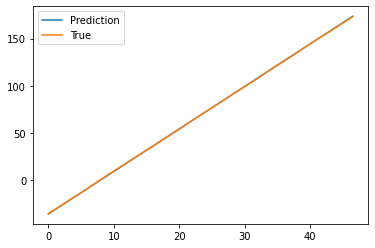

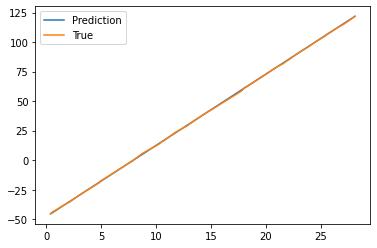

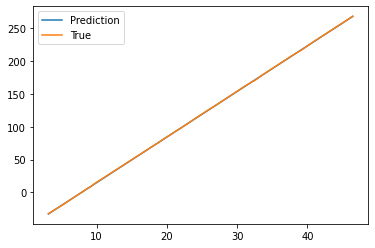

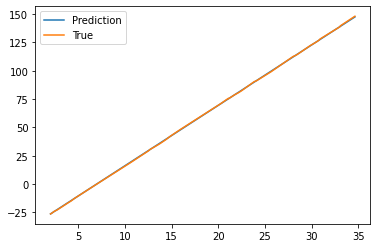

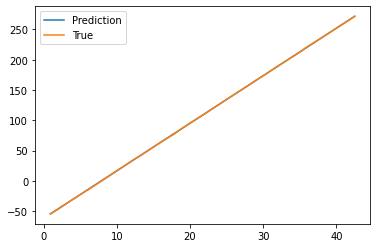

In [40]:
print(solver.theta)
print(theta_true)

predictions =solver.v0*(np.exp(solver.xi)*(solver.T - solver.t0 - solver.tau))
for i in range(N):
  plt.plot(T[i,:], predictions[i,:], label = "Prediction")
  plt.plot(T[i,:], samples[i,:], label = "True")
  plt.legend()
  plt.show()

**Note:** the last algorithm seems to work best since theta converged towards the right values. Maybe the chosen hyperparameters are bad. You can play with it, it seems to be quite fast as long as N and k are reasonable.

The predicted theta parameters are not that close to the real parameters but the graphs (traced thanks to the estimated latent variables) seem to be good.

I'd say that I haven't done enough iterations of my algorithms for the first two algorithms (it takes too long to verify to be honest).

# Exercise 3

Please see the answers on the pdf I sent with the notebook.